# Final project: Recommender System for MovieLens Dataset
TEAM F

IOANNIDIS KONSTANTINOS 2931

MARIS ATHANASIOS 3045

TSATANIS PANAGIOTIS 3014

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
from pydoc import help  # can type in the python console `help(name of function)` to get the documentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML
import math

In [ ]:
#If datasets not already in drive, then upload them in colab by running this cell
from google.colab import files
uploaded = files.upload()

Saving links.csv to links.csv
Saving movies.csv to movies.csv
Saving ratings.csv to ratings.csv
Saving README.txt to README.txt
Saving tags.csv to tags.csv


## Ratings Dataframe

In [ ]:
df_ratings= pd.read_csv("ratings.csv")
df_ratings

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


## Movies Dataframe

In [ ]:
df_movies= pd.read_csv("movies.csv")
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [ ]:
genres_values2 = [ 'Action','Adventure','Animation','Children','Comedy','Crime','Documentary',
                 'Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western','(no genres listed)']

genres_encoded = df_movies
# Create binary columns for each genre
for genre in genres_values2:
    genres_encoded[genre] = df_movies['genres'].str.contains(genre).astype(int)

df_regressors = pd.merge(df_ratings.head(100000), genres_encoded.head(100000), on='movieId', how='inner')
df_regressors = df_regressors.drop('title',axis=1)
df_regressors = df_regressors.drop('genres',axis=1)


df_regressors

<ipython-input-235-fb10240918d0>:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  genres_encoded[genre] = df_movies['genres'].str.contains(genre).astype(int)


,userId,movieId,rating,timestamp,Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,(no genres listed)
0,1,296,5.0,1147880044,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
1,3,296,5.0,1439474476,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
2,4,296,4.0,1573938898,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
3,5,296,4.0,830786155,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
4,7,296,4.0,835444730,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,757,1151,3.5,1184015224,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
99996,757,1329,4.0,1186425688,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
99997,757,1341,3.5,1186425698,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
99998,757,1757,3.5,1184074767,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


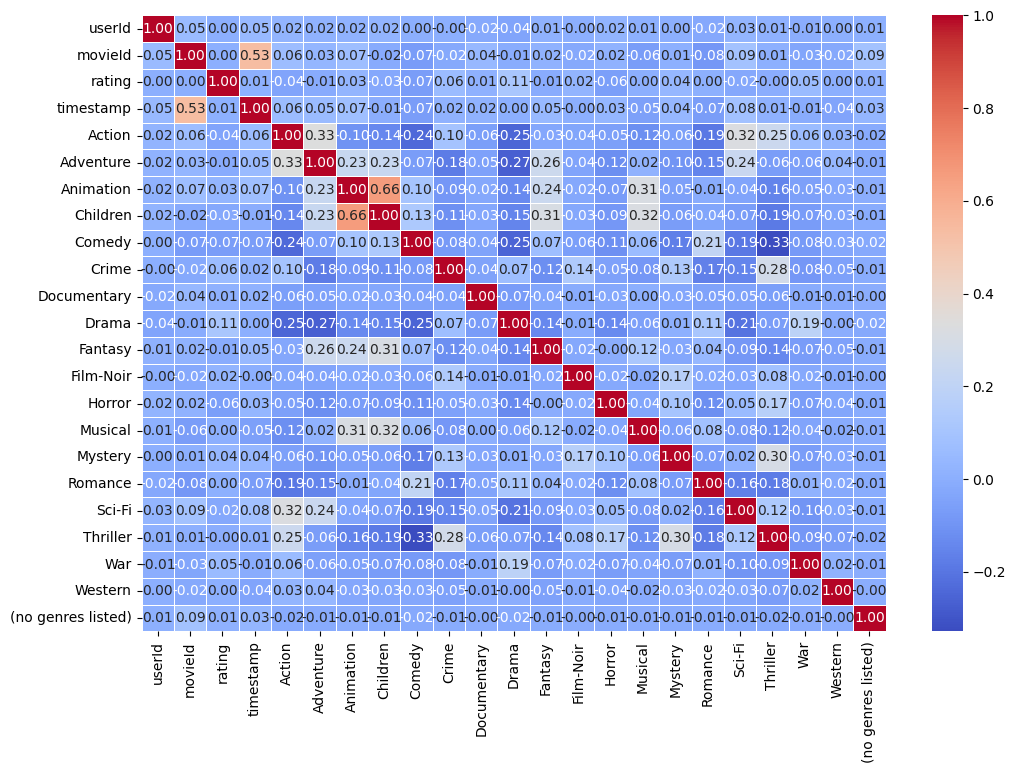

In [ ]:
#Produce a heatmap of correlation matrix

correlation_matrix = df_regressors.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

In [ ]:
#Print statistical information about the dataset for regression
print(df_regressors.describe())

              userId        movieId         rating     timestamp  \
count  100000.000000  100000.000000  100000.000000  1.000000e+05   
mean      387.633370   20861.816250       3.585315  1.202491e+09   
std       220.610909   38208.379944       1.041537  2.348316e+08   
min         1.000000       1.000000       0.500000  8.281634e+08   
25%       187.000000    1089.000000       3.000000  9.853806e+08   
50%       406.000000    2719.000000       4.000000  1.170491e+09   
75%       572.000000    8370.000000       4.000000  1.439794e+09   
max       757.000000  206272.000000       5.000000  1.574254e+09   

              Action      Adventure      Animation       Children  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.305110       0.236360       0.067750       0.086600   
std         0.460456       0.424848       0.251318       0.281249   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

In [ ]:
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

#Removes outliers from given dataset

def remove_outliers(df):
  new_df = df

  # Calculate the IQR for ratings
  Q1 = new_df['rating'].quantile(0.25)
  Q3 = new_df['rating'].quantile(0.75)
  IQR = Q3 - Q1

  # Identify and remove outliers
  new_df = new_df[(new_df['rating'] >= Q1 - 1.5 * IQR) & (new_df['rating'] <= Q3 + 1.5 * IQR)]


  return new_df

In [ ]:
df_regressors = remove_outliers(df_regressors)
df_regressors

,userId,movieId,rating,timestamp,Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,(no genres listed)
0,1,296,5.0,1147880044,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
1,3,296,5.0,1439474476,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
2,4,296,4.0,1573938898,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
3,5,296,4.0,830786155,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
4,7,296,4.0,835444730,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,757,1151,3.5,1184015224,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
99996,757,1329,4.0,1186425688,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
99997,757,1341,3.5,1186425698,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
99998,757,1757,3.5,1184074767,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# Fill missing values with the mean of each columndf.fillna(df.mean(), inplace=True)
# Fill missing values with the median of each columndf.fillna(df.median(), inplace=True)
# Fill missing values with the mode of each columndf.fillna(df.mode().iloc[0], inplace=True)

#Find the total number of missing values from the entire dataset
df_ratings.isnull().sum().sum()

0

From above we observe that there are not missing values.So we do not have to use the function fillna for the ratings dataframe.We do the same for the remaining dataframes.

In [ ]:
print(df_movies.isnull().sum().sum())

0


So far we have checked all files if there are missing values and we have filled the missings values.

## Sorted by movieId

In [ ]:
ratings_sorted = df_ratings.sort_values(by=['movieId'])
ratings_sorted

,userId,movieId,rating,timestamp
2001185,13334,1,5.0,832023973
10627899,69000,1,4.0,1564248795
4075778,26803,1,3.5,1106468113
19245863,124893,1,3.5,1173048946
21816622,141835,1,3.5,1558539488
...,...,...,...,...
18457961,119571,209157,1.5,1574280748
17864443,115835,209159,3.0,1574280985
1036618,6964,209163,4.5,1574284913
18457962,119571,209169,3.0,1574291826


## Average Rating

In [ ]:
#For each movieId we're going to find the average rating
avg_rating = (ratings_sorted.groupby(['movieId'], as_index=False).mean().groupby('movieId')['rating'].mean())
avg_rating = avg_rating.to_frame()
avg_rating

,rating
movieId,
1,3.893708
2,3.251527
3,3.142028
4,2.853547
5,3.058434
...,...
209157,1.500000
209159,3.000000
209163,4.500000


## Sorted by Rating

In [ ]:
sorted_df = avg_rating.sort_values(by='rating', ascending=False)
sorted_df

,rating
movieId,
136782,5.0
186119,5.0
137032,5.0
184643,5.0
137038,5.0
...,...
5805,0.5
199922,0.5
194608,0.5


## Finding number of votes

In [ ]:
#Finding number of votes for each movie
count_rating = ratings_sorted.groupby(['movieId'])['movieId'].count()
count_rating = count_rating.to_frame()
count_rating.rename(columns = {'movieId':'no_of_votes'}, inplace = True)
count_rating

,no_of_votes
movieId,
1,57309
2,24228
3,11804
4,2523
5,11714
...,...
209157,1
209159,1
209163,1


## Sorted by votes

In [ ]:
sorted_by_votes = count_rating.sort_values(by='no_of_votes', ascending=False)
sorted_by_votes

,no_of_votes
movieId,
356,81491
318,81482
296,79672
593,74127
2571,72674
...,...
167308,1
167326,1
167336,1


## Merging average_rating and number of votes

In [ ]:
#Merging average_rating and number of votes for each movie
ratings = avg_rating.merge(count_rating, on = 'movieId')
ratings

,rating,no_of_votes
movieId,,
1,3.893708,57309
2,3.251527,24228
3,3.142028,11804
4,2.853547,2523
5,3.058434,11714
...,...,...
209157,1.500000,1
209159,3.000000,1
209163,4.500000,1


In [ ]:
from sklearn.metrics import mean_squared_error

def measure_mean_squared_error(df_ratings, df_recommended_movies):
  df = df_ratings[df_ratings['movieId'].isin(set(df_recommended_movies['movieId']))]

  mean_ratings = df.groupby('movieId')['rating'].mean().reset_index()

  mean_ratings = mean_ratings.sort_values(by=['movieId'])

  df_recommended_movies2 = df_recommended_movies.sort_values(by=['movieId'])

  mse = mean_squared_error(mean_ratings['rating'].values.flatten(), df_recommended_movies2['rating'].values.flatten())

  return mse

In [ ]:
from sklearn.metrics import mean_absolute_error

def measure_mean_absolute_error(df_ratings, df_recommended_movies):
  df = df_ratings[df_ratings['movieId'].isin(set(df_recommended_movies['movieId']))]

  mean_ratings = df.groupby('movieId')['rating'].mean().reset_index()

  mean_ratings = mean_ratings.sort_values(by=['movieId'])

  df_recommended_movies2 = df_recommended_movies.sort_values(by=['movieId'])

  mae = mean_absolute_error(mean_ratings['rating'].values.flatten(), df_recommended_movies2['rating'].values.flatten())

  return mae

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

def measure_root_mean_squared_error(df_ratings, df_recommended_movies):
  df = df_ratings[df_ratings['movieId'].isin(set(df_recommended_movies['movieId']))]

  mean_ratings = df.groupby('movieId')['rating'].mean().reset_index()

  mean_ratings = mean_ratings.sort_values(by=['movieId'])

  df_recommended_movies2 = df_recommended_movies.sort_values(by=['movieId'])

  rmse = np.sqrt(mean_squared_error(mean_ratings['rating'].values.flatten(), df_recommended_movies2['rating'].values.flatten()))

  return rmse

## Generating the user-movie matrix

In [ ]:
#Now we will connect the data in one dataframe with the command

df_ratings=df_ratings.drop('timestamp',axis=1)
print(df_ratings)

limit_df_ratings=df_ratings.head(10000)
print(limit_df_ratings)

new___df=pd.pivot_table(limit_df_ratings, index='userId', columns=['movieId'], values='rating', aggfunc='mean', fill_value=0)

print("****")
print(new___df)


          userId  movieId  rating
0              1      296     5.0
1              1      306     3.5
2              1      307     5.0
3              1      665     5.0
4              1      899     3.5
...          ...      ...     ...
25000090  162541    50872     4.5
25000091  162541    55768     2.5
25000092  162541    56176     2.0
25000093  162541    58559     4.0
25000094  162541    63876     5.0

[25000095 rows x 3 columns]
      userId  movieId  rating
0          1      296     5.0
1          1      306     3.5
2          1      307     5.0
3          1      665     5.0
4          1      899     3.5
...      ...      ...     ...
9995      75      736     4.0
9996      75      778     3.0
9997      75      783     3.0
9998      75      805     3.5
9999      75      832     3.0

[10000 rows x 3 columns]
****
movieId  1       2       3       5       6       7       9       10      \
userId                                                                    
1           0.0     0.

# SVD

In [ ]:
#Perform SVD on ratings dataset

from scipy.sparse.linalg import svds

ratings_matrix = new___df.values

k=15
U, sigma, Vt = svds(ratings_matrix, k)

# Convert sigma to diagonal matrix
sigma_diag_matrix = np.diag(sigma)

sigma_reduced = np.zeros((k, k))
np.fill_diagonal(sigma_reduced, sigma[:k])
U_reduced = U[:, :k]
Vt_reduced = Vt[:k, :]

# Reconstruct the original matrix
#predicted_ratings = np.dot(np.dot(U, sigma_diag_matrix), Vt)
predicted_ratings = np.dot(U_reduced, np.dot(sigma_reduced, Vt_reduced))

user_ids = [f"User_{i}" for i in range(1,predicted_ratings.shape[0] + 1)]
movie_ids = [f"Movie_{j}" for j in new___df.columns.tolist()]


df_ratings_reconstructed = pd.DataFrame(predicted_ratings, index= user_ids,columns = movie_ids)

print(df_ratings_reconstructed)


users = []
labels = df_ratings_reconstructed.columns.tolist()
movies = []
ratings = []

for i in range(1,df_ratings_reconstructed.shape[0] + 1):
  user_id = 'User_' + str(i)
  for j in range(len(labels)):
    ratings.append(df_ratings_reconstructed.loc[user_id, labels[j]])
    users.append(user_id.replace("User_", ""))
    movies.append(labels[j].replace("Movie_", ""))

data = {
    'userId' : users,
    'movieId' : movies,
    'rating' : ratings
}

df_ratings_reconstructed = pd.DataFrame(data, columns=['userId', 'movieId', 'rating'])

df_ratings_reconstructed

          Movie_1   Movie_2   Movie_3   Movie_5   Movie_6   Movie_7   Movie_9  \
User_1   0.121884  0.093949  0.017066 -0.064380 -0.205676 -0.045805 -0.108475   
User_2   2.469667 -0.339748  0.109876  0.700939  0.923380  0.549939  0.680370   
User_3   3.945504 -0.089844  0.019990 -0.039668  0.175693 -0.081307  0.071065   
User_4   2.166584  0.428386  0.034442 -0.207078 -0.307686 -0.004306  0.083837   
User_5   2.846523  0.377693  0.578421  0.482341  0.914426  0.742478 -0.034743   
...           ...       ...       ...       ...       ...       ...       ...   
User_71  1.354752  0.181606  0.072909  0.273743  0.246607  0.271287 -0.004909   
User_72 -0.087156  1.945239  0.031759  0.064578  4.015074  3.946589  0.001211   
User_73  0.799418 -0.050075  0.243490  0.106974  0.373066  0.235616  0.007578   
User_74  1.026053  0.283509  0.061708  0.208293  0.207382  0.169757 -0.015414   
User_75  1.965771  0.489365  0.212709  0.383987  0.479403  0.456639 -0.108245   

         Movie_10  Movie_11

,userId,movieId,rating
0,1,1,0.121884
1,1,2,0.093949
2,1,3,0.017066
3,1,5,-0.064380
4,1,6,-0.205676
...,...,...,...
246520,75,195159,-0.125418
246521,75,200818,-0.125418
246522,75,200838,-0.075251
246523,75,203375,-0.112876


In [ ]:
#Recommend movies for user 1

def recommend_movies_svd(user_id, original_df, reconstructed_df, num_recommendations=10):

  rated_movies = original_df[original_df['userId'] == user_id]['movieId']

  unrated_movies = set(reconstructed_df[reconstructed_df['userId'] == user_id]['movieId']).difference(set(rated_movies))

  df_predicted_ratings = reconstructed_df[reconstructed_df['userId'] == user_id]
  df_predicted_ratings = df_predicted_ratings[df_predicted_ratings['movieId'].isin(unrated_movies)]

  recommended_movies = df_predicted_ratings.sort_values(by=['rating'], ascending=False).head(num_recommendations)

  return recommended_movies

recommended_movies = recommend_movies_svd('1', limit_df_ratings, df_ratings_reconstructed)
recommended_movies

,userId,movieId,rating
1843,1,4973,1.084015
163,1,296,1.045422
2079,1,6711,0.993383
1722,1,4226,0.944523
1991,1,6016,0.915871
1287,1,2858,0.891056
288,1,527,0.862655
2167,1,7361,0.838025
324,1,593,0.830941
1328,1,2959,0.812344


In [ ]:
#Measure error rate

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

ratings_matrix_flat = ratings_matrix.flatten()
predicted_ratings_flat = predicted_ratings.flatten()

svd_mse = mean_squared_error(ratings_matrix_flat, predicted_ratings_flat)
svd_rmse = np.sqrt(svd_mse)
svd_mae = mean_absolute_error(ratings_matrix_flat, predicted_ratings_flat)

print("RMSE:", svd_rmse)
print("MSE: ", svd_mse)
print("MAE:", svd_mae)

RMSE: 0.43735932964969926
MSE:  0.19128318323163432
MAE: 0.15232749983346272


# NMF

In [ ]:
#Perform NMF on ratings dataset

from sklearn.decomposition import NMF

# Since NMF requires the matrix to have no missing values, we'll replace NaNs with 0.
# This is a simplistic approach; in a real-world scenario, you might want to use a more sophisticated method.
user_item_matrix = np.nan_to_num(ratings_matrix)

# Perform matrix factorization using NMF.

nmf_model = NMF(n_components=10, init='random', random_state=0)
user_latent_features = nmf_model.fit_transform(user_item_matrix)
item_latent_features = nmf_model.components_

predicted_ratings = np.dot(user_latent_features, item_latent_features)

user_ids = [f"User_{i}" for i in range(1,predicted_ratings.shape[0] + 1)]
movie_ids = [f"Movie_{j}" for j in new___df.columns.tolist()]


df_ratings_reconstructed = pd.DataFrame(predicted_ratings, index= user_ids,columns = movie_ids)

print(df_ratings_reconstructed)

users = []
labels = df_ratings_reconstructed.columns.tolist()
movies = []
ratings = []

for i in range(1,df_ratings_reconstructed.shape[0] + 1):
  user_id = 'User_' + str(i)
  for j in range(len(labels)):
    ratings.append(df_ratings_reconstructed.loc[user_id, labels[j]])
    users.append(user_id.replace("User_", ""))
    movies.append(labels[j].replace("Movie_", ""))

data = {
    'userId' : users,
    'movieId' : movies,
    'rating' : ratings
}

df_ratings_reconstructed = pd.DataFrame(data, columns=['userId', 'movieId', 'rating'])

df_ratings_reconstructed

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


          Movie_1   Movie_2   Movie_3   Movie_5   Movie_6   Movie_7   Movie_9  \
User_1   0.170948  0.057860  0.106436  0.000331  0.001880  0.020465  0.000000   
User_2   2.626477  0.686290  0.076718  0.392603  0.235303  0.275877  0.151049   
User_3   4.063025  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
User_4   1.842407  0.502046  0.013390  0.144286  0.085649  0.101144  0.055714   
User_5   0.999618  0.453325  0.544652  0.233370  0.503357  0.494562  0.048302   
...           ...       ...       ...       ...       ...       ...       ...   
User_71  0.745102  0.302533  0.119222  0.162173  0.150985  0.181269  0.037957   
User_72  0.000000  1.940597  0.181980  0.035012  4.247262  4.010996  0.168006   
User_73  0.194509  0.047265  0.258919  0.015064  0.218041  0.155951  0.006320   
User_74  0.426376  0.181550  0.068672  0.103583  0.089739  0.112681  0.024016   
User_75  0.771110  0.343912  0.342066  0.201223  0.348893  0.318494  0.041827   

         Movie_10  Movie_11

,userId,movieId,rating
0,1,1,0.170948
1,1,2,0.057860
2,1,3,0.106436
3,1,5,0.000331
4,1,6,0.001880
...,...,...,...
246520,75,195159,0.033283
246521,75,200818,0.033283
246522,75,200838,0.019970
246523,75,203375,0.029955


In [ ]:
#Recommend movies for user 1

def recommend_movies_nmf(user_id, original_df, reconstructed_df, num_recommendations=10):

  rated_movies = original_df[original_df['userId'] == user_id]['movieId']

  unrated_movies = set(reconstructed_df[reconstructed_df['userId'] == user_id]['movieId']).difference(set(rated_movies))


  df_predicted_ratings = reconstructed_df[reconstructed_df['userId'] == user_id]
  df_predicted_ratings = df_predicted_ratings[df_predicted_ratings['movieId'].isin(unrated_movies)]

  recommended_movies = df_predicted_ratings.sort_values(by=['rating'], ascending=False).head(num_recommendations)

  return recommended_movies

recommended_movies = recommend_movies_svd('1', limit_df_ratings, df_ratings_reconstructed)
recommended_movies

,userId,movieId,rating
1287,1,2858,0.880042
163,1,296,0.864523
1328,1,2959,0.845846
1722,1,4226,0.809435
1991,1,6016,0.803009
324,1,593,0.754779
2713,1,58559,0.750620
1063,1,2329,0.742745
1843,1,4973,0.737129
2735,1,60069,0.718238


In [ ]:
#Calculate errors

ratings_matrix_flat = ratings_matrix.flatten()
predicted_ratings_flat = predicted_ratings.flatten()

nmf_mse = mean_squared_error(ratings_matrix_flat, predicted_ratings_flat)
nmf_rmse = np.sqrt(nmf_mse)
nmf_mae = mean_absolute_error(ratings_matrix_flat, predicted_ratings_flat)

print("RMSE:", nmf_rmse)
print("MSE:", nmf_mse)
print("MAE:", nmf_mae)

RMSE: 0.502634327080889
MSE: 0.25264126676005805
MAE: 0.14983825285608293


## Rmse Function

In [ ]:
# Function to compute the root mean square error
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return np.sqrt(mean_squared_error(prediction, ground_truth))

# SGD

In [ ]:
#perform SGD on ratings dataset

def matrix_factorization(R, K, steps=100, alpha=0.0002, beta=0.02):
    N = len(R)
    M = len(R[0])
    P = np.random.rand(N, K)
    Q = np.random.rand(M, K)

    Q = Q.T
    for step in range(steps):
        for i in range(N):
            for j in range(M):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i, :], Q[:, j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = np.dot(P, Q)
        e = 0
        for i in range(N):
            for j in range(M):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(P[i, :], Q[:, j]), 2)
                    for k in range(K):
                        e = e + (beta / 2) * (pow(P[i][k], 2) + pow(Q[k][j], 2))
        if e < 0.001:
            break
    return P, Q.T

In [ ]:
K = 2

# Perform matrix factorization using SGD
nP, nQ = matrix_factorization(new___df.values, K)
nR = np.dot(nP, nQ.T)

In [ ]:
#Print predicted ratings
nR

array([[3.57992401, 3.75198825, 3.18675653, ..., 2.83106629, 2.24409064,
        2.71548231],
       [3.86395455, 3.39777971, 3.36748904, ..., 2.47900647, 2.32969316,
        2.58540028],
       [4.19363629, 3.73260941, 3.65978001, ..., 2.73026108, 2.53483853,
        2.82980378],
       ...,
       [3.24152612, 2.7980084 , 2.81923424, ..., 2.03328667, 1.94697655,
        2.14113514],
       [2.15086693, 2.13462831, 1.90141598, ..., 1.59512721, 1.33131745,
        1.56809679],
       [3.35025819, 2.55099939, 2.87609896, ..., 1.79995478, 1.96394771,
        2.03228484]])

In [ ]:
#Construct the predicted ratings dataset

df_ratings_reconstructed = pd.DataFrame(nR, index= user_ids,columns = movie_ids)

print(df_ratings_reconstructed)

users = []
labels = df_ratings_reconstructed.columns.tolist()
movies = []
ratings = []

for i in range(1,df_ratings_reconstructed.shape[0] + 1):
  user_id = 'User_' + str(i)
  for j in range(len(labels)):
    ratings.append(df_ratings_reconstructed.loc[user_id, labels[j]])
    users.append(user_id.replace("User_", ""))
    movies.append(labels[j].replace("Movie_", ""))

data = {
    'userId' : users,
    'movieId' : movies,
    'rating' : ratings
}

df_ratings_reconstructed = pd.DataFrame(data, columns=['userId', 'movieId', 'rating'])

df_ratings_reconstructed

          Movie_1   Movie_2   Movie_3   Movie_5   Movie_6   Movie_7   Movie_9  \
User_1   3.579924  3.751988  3.186757  3.632151  4.037538  3.230310  2.139443   
User_2   3.863955  3.397780  3.367489  3.405055  4.121275  3.079624  2.002560   
User_3   4.193636  3.732609  3.659780  3.731090  4.489216  3.370430  2.194554   
User_4   3.607628  3.365437  3.165450  3.331769  3.917948  2.995855  1.960522   
User_5   3.621151  3.417191  3.181645  3.375195  3.946840  3.031520  1.986281   
...           ...       ...       ...       ...       ...       ...       ...   
User_71  3.522658  3.107247  3.071105  3.111870  3.760730  2.813591  1.830187   
User_72  3.778667  3.395144  3.301164  3.387093  4.056571  3.056825  1.992395   
User_73  3.241526  2.798008  2.819234  2.815101  3.438364  2.550803  1.655312   
User_74  2.150867  2.134628  1.901416  2.087697  2.382393  1.866137  1.229143   
User_75  3.350258  2.550999  2.876099  2.640102  3.429984  2.423563  1.550507   

         Movie_10  Movie_11

,userId,movieId,rating
0,1,1,3.579924
1,1,2,3.751988
2,1,3,3.186757
3,1,5,3.632151
4,1,6,4.037538
...,...,...,...
246520,75,195159,2.490593
246521,75,200818,3.220879
246522,75,200838,1.799955
246523,75,203375,1.963948


In [ ]:
#Recommend movies for user 1

def recommend_movies_sgd(user_id, original_df, reconstructed_df, num_recommendations=10):

  rated_movies = original_df[original_df['userId'] == user_id]['movieId']

  unrated_movies = set(reconstructed_df[reconstructed_df['userId'] == user_id]['movieId']).difference(set(rated_movies))


  df_predicted_ratings = reconstructed_df[reconstructed_df['userId'] == user_id]
  df_predicted_ratings = df_predicted_ratings[df_predicted_ratings['movieId'].isin(unrated_movies)]

  recommended_movies = df_predicted_ratings.sort_values(by=['rating'], ascending=False).head(num_recommendations)

  return recommended_movies

user_id = '1'
recommended_movies = recommend_movies_sgd(user_id, limit_df_ratings, df_ratings_reconstructed)
recommended_movies

,userId,movieId,rating
541,1,1136,5.119614
340,1,628,5.020134
1354,1,3034,4.978654
28,1,36,4.976205
1502,1,3470,4.961314
1203,1,2632,4.955698
3270,1,177765,4.936636
176,1,318,4.927465
183,1,333,4.922746
2383,1,30867,4.907274


In [ ]:
# Calculate the RMSE for SGD
sgd_rmse = rmse(nR, new___df.values)
sgd_mae = mean_absolute_error(new___df.values.flatten(), nR.flatten())
sgd_mse = sgd_rmse*sgd_rmse
print("RMSE:", sgd_rmse)
print("MSE:", sgd_mse)
print("MAE:", sgd_mae)

RMSE: 0.865661643756951
MSE: 0.7493700814719864
MAE: 2.7149765970435973


# Alphas

In [ ]:
#Create a dataset that also includes a movie's genres and title

df_ratings = pd.read_csv("ratings.csv")
df_movies = pd.read_csv("movies.csv")
result_inner = pd.merge(df_ratings, df_movies, on='movieId', how='inner')

In [ ]:
df_genres = pd.DataFrame(result_inner).sort_values(by=['userId'])
df_genres

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
421513,1,6370,4.5,1147869191,"Spanish Apartment, The (L'auberge espagnole) (...",Comedy|Drama|Romance
422733,1,6377,4.0,1147868469,Finding Nemo (2003),Adventure|Animation|Children|Comedy
457445,1,6539,3.5,1147868461,Pirates of the Caribbean: The Curse of the Bla...,Action|Adventure|Comedy|Fantasy
494672,1,6711,5.0,1147868622,Lost in Translation (2003),Comedy|Drama|Romance
...,...,...,...,...,...,...
17903617,162541,3824,2.0,1240951385,Autumn in New York (2000),Drama|Romance
12795936,162541,1321,2.5,1240950870,"American Werewolf in London, An (1981)",Comedy|Horror|Thriller
4331258,162541,593,4.0,1240953576,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
10068181,162541,344,0.5,1240949530,Ace Ventura: Pet Detective (1994),Comedy


In [ ]:
target_user_id = 1

curr_df = df_genres[df_genres['userId'] == target_user_id]

curr_df['genres'] = curr_df['genres'].str.split('|')

curr_df.head()

<ipython-input-38-c19ab87bc328>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['genres'] = curr_df['genres'].str.split('|')


,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),"[Comedy, Crime, Drama, Thriller]"
421513,1,6370,4.5,1147869191,"Spanish Apartment, The (L'auberge espagnole) (...","[Comedy, Drama, Romance]"
422733,1,6377,4.0,1147868469,Finding Nemo (2003),"[Adventure, Animation, Children, Comedy]"
457445,1,6539,3.5,1147868461,Pirates of the Caribbean: The Curse of the Bla...,"[Action, Adventure, Comedy, Fantasy]"
494672,1,6711,5.0,1147868622,Lost in Translation (2003),"[Comedy, Drama, Romance]"


In [ ]:
#For userId = 1 first
#Preproccessing categorical features

curr_df = df_genres[df_genres['userId'] == target_user_id]

curr_df['genres'] = curr_df['genres'].str.split('|')

genres_values = [ 'Action','Adventure','Animation','Children','Comedy','Crime','Documentary',
                 'Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western','(no genres listed)']

new_df = pd.DataFrame(index=curr_df['movieId'], columns=genres_values)

line_counter = 0

for index, row in curr_df.iterrows():
    genres_list = row['genres']
    curr_movie = curr_df['movieId'].iloc[line_counter]

    for i in genres_list:
      new_df.at[int(curr_movie), i] = row['rating']

    line_counter =line_counter + 1

new_df = new_df.fillna(0)
new_df.head()

<ipython-input-39-1b352f2b6631>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['genres'] = curr_df['genres'].str.split('|')


,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,(no genres listed)
movieId,,,,,,,,,,,,,,,,,,,
296,0.0,0.0,0.0,0.0,5.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0
6370,0.0,0.0,0.0,0.0,4.5,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0
6377,0.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6539,3.5,3.5,0.0,0.0,3.5,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6711,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0


In [ ]:
#Calculate how much the specific user likes each genre

denominator = new_df.sum().sum()
sum_by_column = []
counter = 0

for i in genres_values:
  sum_by_column.append(new_df[i].sum() / denominator)
  counter = counter + 1


sum_by_column_df = pd.DataFrame(sum_by_column, index=genres_values).T
sum_by_column_df

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,(no genres listed)
0,0.0275,0.068333,0.013333,0.019167,0.148333,0.054167,0.003333,0.341667,0.03,0.005833,0.005833,0.030833,0.023333,0.125,0.030833,0.035833,0.0325,0.004167,0.0


In [ ]:
#Recommend movies from user's favourite genre that have mean rating >= 3 and are popular

favourite_genre = sum_by_column_df.idxmax(axis=1).values[0]


df_genres = pd.DataFrame(result_inner)

def recommend_by_genre(user_id, df, fav_genre, num_recommendations=10):
  rated_movies = df[df['userId'] == user_id ]['movieId']

  #########################################################################################

  test_set = rated_movies.iloc[:-math.floor(rated_movies.shape[0] * 0.2)]
  rated_movies = rated_movies[~rated_movies.isin(test_set)]

  #########################################################################################

  unrated_movies = set(df['movieId']).difference(set(rated_movies))

  fav_genre_movies = []
  for movie_id in df['movieId'].unique():
    curr_df = df[df['movieId'] == movie_id]
    genres_list = curr_df['genres'].iloc[0]

    if fav_genre in genres_list:
      fav_genre_movies.append(movie_id)


  recommended_movies = df[df['movieId'].isin(unrated_movies) & df['movieId'].isin(set(fav_genre_movies))]
  tmp = recommended_movies


  recommended_movies = recommended_movies.drop('userId', axis=1)


  popular_movies = []
  for movie_id in df['movieId'].unique():
    num_ratings = df[df['movieId'] == movie_id].shape[0]

    if (num_ratings >= 50) & (movie_id in unrated_movies):
      popular_movies.append(movie_id)


  recommended_movies = recommended_movies[recommended_movies['movieId'].isin(set(popular_movies))]


  recommended_movies = recommended_movies.groupby('movieId')['rating'].mean().reset_index()


  recommended_movies = recommended_movies[recommended_movies['rating'] > 3]


  recommended_movies = pd.merge(tmp.drop('rating', axis=1), recommended_movies, on='movieId', how='inner')

  recommended_movies = recommended_movies.drop_duplicates(subset='movieId')

  recommended_movies = recommended_movies.sort_values(by=['rating'], ascending=False)

  recommended_movies = recommended_movies.drop(['userId', 'timestamp'], axis=1)

  return recommended_movies, test_set

user_id = 1

recommended_movies_by_genre, test_set = recommend_by_genre(user_id, df_genres.head(1000000), favourite_genre)
recommended_movies_by_genre.head(10)

,movieId,title,genres,rating
480516,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.413576
0,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.188912
224319,6016,City of God (Cidade de Deus) (2002),Action|Adventure|Crime|Drama|Thriller,4.181587
113851,1217,Ran (1985),Drama|War,4.142050
160595,2351,"Nights of Cabiria (Notti di Cabiria, Le) (1957)",Drama,4.107364
124134,1250,"Bridge on the River Kwai, The (1957)",Adventure|Drama|War,4.095140
119071,1237,"Seventh Seal, The (Sjunde inseglet, Det) (1957)",Drama,4.093324
278070,7327,Persona (1966),Drama,4.093056
217325,5147,Wild Strawberries (Smultronstället) (1957),Drama,4.086701
79672,306,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama,4.072967


In [ ]:
df_ratings = pd.read_csv("ratings.csv")
df_ratings = df_ratings[df_ratings['userId'] == user_id]
df_ratings = df_ratings[df_ratings['movieId'].isin(test_set)]
recommended_movies_by_genre = recommended_movies_by_genre[recommended_movies_by_genre['movieId'].isin(test_set)]

alphas_mse = measure_mean_squared_error(df_ratings, recommended_movies_by_genre)
alphas_rmse = measure_root_mean_squared_error(df_ratings, recommended_movies_by_genre)
alphas_mae = measure_mean_absolute_error(df_ratings, recommended_movies_by_genre)
print("RMSE Alphas: ", alphas_rmse)
print("MSE Alphas: ", alphas_mse)
print("MAE Alphas: ", alphas_mae)

RMSE Alphas:  0.9850522236482879
MSE Alphas:  0.9703278833144368
MAE Alphas:  0.8210276744297015


In [ ]:
curr_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),"[Comedy, Crime, Drama, Thriller]"
421513,1,6370,4.5,1147869191,"Spanish Apartment, The (L'auberge espagnole) (...","[Comedy, Drama, Romance]"
422733,1,6377,4.0,1147868469,Finding Nemo (2003),"[Adventure, Animation, Children, Comedy]"
457445,1,6539,3.5,1147868461,Pirates of the Caribbean: The Curse of the Bla...,"[Action, Adventure, Comedy, Fantasy]"
494672,1,6711,5.0,1147868622,Lost in Translation (2003),"[Comedy, Drama, Romance]"


# GPT Like Recommendations

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df_ratings= pd.read_csv("ratings.csv")
df_ratings = df_ratings.drop('timestamp', axis=1).head(10000)
df_ratings

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5
...,...,...,...
9995,75,736,4.0
9996,75,778,3.0
9997,75,783,3.0
9998,75,805,3.5


In [ ]:
#We will make predictions for user 1

user_id = 1
example_user = df_ratings[df_ratings['userId'] == user_id]
example_user

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5
...,...,...,...
65,1,27193,3.0
66,1,27266,4.5
67,1,27721,3.0
68,1,31956,3.5


In [ ]:
#This algorithm finds users that like the same things as the target user. Then it recommends movies that they like
def recommend_moviesGPT(curr_user, df, curr_user_id, num_recommendations=10):
  df_other_users = df[df['userId'] != curr_user_id]
  curr_user_movies = curr_user['movieId']

  ############################################################################################################
  print(curr_user_movies)

  test_movies = curr_user_movies.iloc[:-math.floor(curr_user_movies.shape[0] * 0.2)]
  print(test_movies)
  curr_user_movies = curr_user_movies[~curr_user_movies.isin(test_movies)]
  print(curr_user_movies)
  ############################################################################################################

  similar_users = df_other_users[df_other_users['movieId'].isin(curr_user_movies)]

  print(similar_users)

  common_movies = []
  users = []
  recommended_movies = []
  for user_id in similar_users['userId']:
    num_common_movies = len(set(similar_users[similar_users['userId'] == user_id]['movieId']) & set(curr_user_movies))

    if num_common_movies > len(curr_user_movies)/8:
      common_movies.append(num_common_movies)
      users.append(user_id)

  data = {
      "common_movies" : common_movies,
      "user_id" : users
  }

  df_similar_users = pd.DataFrame(data, columns=['common_movies', 'user_id'])

  df_similar_users = df_similar_users.drop_duplicates()


  df_similar_users = df_other_users[df_other_users['userId'].isin(users)].groupby('movieId')['rating'].mean().reset_index()

  print(df_similar_users)

  recommended_movies = df_similar_users.sort_values(by=['rating'], ascending=False)

  tmp = set(recommended_movies[recommended_movies['rating'] > 3]['movieId']).difference(set(curr_user_movies))

  recommended_movies = recommended_movies[recommended_movies['movieId'].isin(tmp)]

  return recommended_movies, test_movies

In [ ]:
recommendationsGPT, test_set = recommend_moviesGPT(example_user, df_ratings,1)
recommendationsGPT.head(10)

0       296
1       306
2       307
3       665
4       899
      ...  
65    27193
66    27266
67    27721
68    31956
69    32591
Name: movieId, Length: 70, dtype: int64
0      296
1      306
2      307
3      665
4      899
5     1088
6     1175
7     1217
8     1237
9     1250
10    1260
11    1653
12    2011
13    2012
14    2068
15    2161
16    2351
17    2573
18    2632
19    2692
20    2843
21    3448
22    3569
23    3949
24    4144
25    4308
26    4325
27    4422
28    4703
29    4973
30    5147
31    5269
32    5684
33    5767
34    5878
35    5912
36    5952
37    6016
38    6370
39    6377
40    6539
41    6711
42    6954
43    7209
44    7234
45    7318
46    7323
47    7327
48    7361
49    7365
50    7820
51    7937
52    7938
53    7939
54    7940
55    8014
Name: movieId, dtype: int64
56     8154
57     8327
58     8360
59     8405
60     8685
61     8729
62     8786
63     8873
64     8973
65    27193
66    27266
67    27721
68    31956
69    32591
Name: movieId, d

,movieId,rating
1070,27728,5.0
1105,33270,5.0
1361,98491,5.0
1363,98607,5.0
203,923,5.0
1368,103228,5.0
1059,26903,5.0
1060,27156,5.0
505,2395,5.0
1211,52885,5.0


In [ ]:
df_ratings = pd.read_csv("ratings.csv")
df_ratings = df_ratings[df_ratings['userId'] == user_id]
df_ratings = df_ratings[df_ratings['movieId'].isin(test_set)]
recommendationsGPT = recommendationsGPT[recommendationsGPT['movieId'].isin(test_set)]

gpt_mse = measure_mean_squared_error(df_ratings, recommendationsGPT)
gpt_rmse = measure_root_mean_squared_error(df_ratings, recommendationsGPT)
gpt_mae = measure_mean_absolute_error(df_ratings, recommendationsGPT)
print("MSE GPT: ", gpt_mse)
print("RMSE GPT: ", gpt_rmse)
print("MAE GPT: ", gpt_mae)

MSE GPT:  0.7433619281045752
RMSE GPT:  0.8621843933315977
MAE GPT:  0.6936274509803921


# Keras NN Recomendations

In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
import numpy as np
import pandas as pd

df_ratings = pd.read_csv("ratings.csv")
df_movies = pd.read_csv("movies.csv")

df_keras = pd.merge(df_ratings, df_movies, on='movieId', how='inner').sort_values(by=['rating'], ascending=False)
df_keras = df_keras.head(10000)
df_keras

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
17261693,80939,1569,5.0,994711586,My Best Friend's Wedding (1997),Comedy|Romance
17261631,80165,1569,5.0,1481243337,My Best Friend's Wedding (1997),Comedy|Romance
4862066,15299,1676,5.0,1081126201,Starship Troopers (1997),Action|Sci-Fi
4862065,15290,1676,5.0,1111614204,Starship Troopers (1997),Action|Sci-Fi
...,...,...,...,...,...,...
4871038,99197,1676,5.0,955130256,Starship Troopers (1997),Action|Sci-Fi
17247676,87319,1292,5.0,948568142,Being There (1979),Comedy|Drama
17247681,87464,1292,5.0,1118533877,Being There (1979),Comedy|Drama
17247692,87685,1292,5.0,941221326,Being There (1979),Comedy|Drama


In [ ]:
df_keras = remove_outliers(df_keras)
df_keras

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
17261693,80939,1569,5.0,994711586,My Best Friend's Wedding (1997),Comedy|Romance
17261631,80165,1569,5.0,1481243337,My Best Friend's Wedding (1997),Comedy|Romance
4862066,15299,1676,5.0,1081126201,Starship Troopers (1997),Action|Sci-Fi
4862065,15290,1676,5.0,1111614204,Starship Troopers (1997),Action|Sci-Fi
...,...,...,...,...,...,...
4871038,99197,1676,5.0,955130256,Starship Troopers (1997),Action|Sci-Fi
17247676,87319,1292,5.0,948568142,Being There (1979),Comedy|Drama
17247681,87464,1292,5.0,1118533877,Being There (1979),Comedy|Drama
17247692,87685,1292,5.0,941221326,Being There (1979),Comedy|Drama


In [ ]:
#Prepare a dataset with movies that user 1 has not rated

def recommend_keras(user_id, df):
  rated_movies = df[df['userId'] == user_id ]['movieId']
  unrated_movies = set(df['movieId']).difference(set(rated_movies))

  user_df = df[df['movieId'].isin(unrated_movies)]
  user_df['userId'] = user_id

  new_df = user_df[['userId', 'movieId', 'title', 'genres']]

  new_df = new_df.drop_duplicates()

  return new_df

user_id = 1
new_df = recommend_keras(user_id, df_keras)
new_df

<ipython-input-52-63eff0e6222b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['userId'] = user_id


,userId,movieId,title,genres
17261693,1,1569,My Best Friend's Wedding (1997),Comedy|Romance
4862066,1,1676,Starship Troopers (1997),Action|Sci-Fi
4878421,1,1732,"Big Lebowski, The (1998)",Comedy|Crime
17266875,1,1701,Deconstructing Harry (1997),Comedy|Drama
4859757,1,1320,Alien³ (a.k.a. Alien 3) (1992),Action|Horror|Sci-Fi|Thriller
17253185,1,1300,My Life as a Dog (Mitt liv som hund) (1985),Comedy|Drama
17256559,1,1404,Night Falls on Manhattan (1996),Crime|Drama
17255864,1,1395,Tin Men (1987),Comedy|Drama
17275877,1,1794,Love and Death on Long Island (1997),Comedy|Drama
17275192,1,1726,"Postman, The (1997)",Action|Adventure|Drama|Sci-Fi


In [ ]:
#Prepare data fortraining

from sklearn.model_selection import train_test_split

tmp = df_keras[['title', 'genres']]
X = df_keras.drop(["rating","timestamp", "title", "genres"], axis=1)
y = df_keras['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Normalize the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# define the keras model

model = Sequential()
model.add(Dense(12, input_dim=X.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
# compile the keras model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
model.summary()
# fit the keras model on the dataset
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)
h = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)
# make class predictions with the model
predictions = model.predict(X)
# summarize the first 5 cases
predictions.shape
predictions = predictions.flatten()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                36        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 149 (596.00 Byte)
Trainable params: 149 (596.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
313/313 [==============================] - 1s 2ms/step


In [ ]:
#Print loss and mse

h.history

{'loss': [9.793148040771484,
  0.07632889598608017,
  0.014985665678977966,
  0.0032303694169968367,
  0.0006105325883254409,
  0.0002512336359359324,
  0.00015557539882138371,
  9.621998469810933e-05,
  6.410593050532043e-05,
  4.612861812347546e-05,
  3.46081105817575e-05,
  2.1439573174575344e-05,
  2.0089890313101932e-05,
  1.8369919416727498e-05,
  1.884195262391586e-05,
  1.717684972390998e-05,
  2.292350291099865e-05,
  1.4280294635682367e-05,
  2.4731019948376343e-05,
  9.594455150363501e-06,
  1.9908353351638652e-05,
  1.0353457582823467e-05,
  2.438470437482465e-05,
  6.93677566232509e-06,
  1.538441028969828e-05,
  7.612783065269468e-06,
  2.1809215468238108e-05,
  9.897858944896143e-06,
  1.1877413271577097e-05,
  1.9982613594038412e-05,
  1.025552955979947e-05,
  6.5316708059981465e-06,
  2.9360235203057528e-05,
  8.370587920580874e-07,
  1.5069955225044396e-05,
  1.5478737623197958e-05,
  1.581449032528326e-05,
  1.195640470541548e-05,
  6.7634186962095555e-06,
  5.395252

In [ ]:
#Evaluate the model

keras_mse = model.evaluate(X_test, y_test)
print("MSE = ", keras_mse[0])

63/63 [==============================] - 0s 4ms/step - loss: 9.7072e-04 - mean_squared_error: 9.7072e-04
MSE =  0.0009707247954793274


In [ ]:
back_up= new_df[['userId','movieId']]
back_up

,userId,movieId
17261693,1,1569
4862066,1,1676
4878421,1,1732
17266875,1,1701
4859757,1,1320
17253185,1,1300
17256559,1,1404
17255864,1,1395
17275877,1,1794
17275192,1,1726


In [ ]:
#Produce predictions

new_df = new_df.drop(['title', 'genres'], axis=1)
new_df[['userId']] = scaler.fit_transform(new_df[['userId']])
new_df[['movieId']] = scaler.fit_transform(new_df[['movieId']])
recommended_movies_by_keras = model.predict(new_df)

1/1 [==============================] - 0s 78ms/step


In [ ]:
back_up['rating'] = recommended_movies_by_keras

<ipython-input-60-bb48e7abb040>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  back_up['rating'] = recommended_movies_by_keras


In [ ]:
#Recommend top 10 movies for user 1

recommended_movies_by_keras = back_up.sort_values(by=['rating'], ascending=False)

recommended_movies_by_keras.head(10)

,userId,movieId,rating
17239881,1,1228,5.048503
17242947,1,1251,5.034867
17244522,1,1292,5.008749
17255864,1,1395,5.007158
17256559,1,1404,5.007056
4859757,1,1320,5.006493
17261693,1,1569,5.005184
4862066,1,1676,5.003971
17266875,1,1701,5.003687
17272779,1,1719,5.003483


In [ ]:
keras_rmse = measure_root_mean_squared_error(df_keras, recommended_movies_by_keras)
keras_mae = measure_mean_absolute_error(df_keras, recommended_movies_by_keras)
keras_mse = measure_mean_squared_error(df_keras, recommended_movies_by_keras)
print("MSE Keras: ", keras_mse)
print("RMSE Keras: ", keras_rmse)
print("MAE Keras: ", keras_mae)

MSE Keras:  0.0002442592456617376
RMSE Keras:  0.015628795400213596
MAE Keras:  0.009157687425613403


# Recommendations by KNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df_ratings = pd.read_csv("ratings.csv")
df_ratings = df_ratings.drop('timestamp', axis=1)

In [ ]:
#Sample dataset with the first 150 users

df_ratings2 = df_ratings[df_ratings['userId'].isin(set(list(range(1,151))))]
df_ratings2

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5
...,...,...,...
18257,150,79132,3.5
18258,150,81845,4.0
18259,150,85414,4.0
18260,150,104879,3.5


In [ ]:
df_ratings = df_ratings.head(10000)
df_ratings.head()

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5


In [ ]:
df_ratings

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5
...,...,...,...
9995,75,736,4.0
9996,75,778,3.0
9997,75,783,3.0
9998,75,805,3.5


In [ ]:
ratings_matrix = df_ratings2.pivot(index='userId', columns='movieId', values='rating')
ratings_matrix = ratings_matrix.fillna(0)
ratings_matrix

movieId,1,2,3,4,5,6,7,9,10,11,...,194400,194448,194728,195159,195777,195921,200818,200838,203375,203519
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,5.0,3.0,4.5,2.5
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0
147,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
total_elements = ratings_matrix.size

# Calculate the number of zero elements in the matrix
zero_elements = np.count_nonzero(ratings_matrix == 0)

# Calculate the sparsity of the matrix
sparsity = zero_elements / total_elements

print("Sparsity of the matrix:", sparsity)

Sparsity of the matrix: 0.9718959679901508


In [ ]:
# Preprocessing: Center the ratings around 0 for each user
ratings_centered = ratings_matrix.subtract(ratings_matrix.mean(axis=1), axis=0)
ratings_centered = ratings_centered.fillna(0)

ratings_centered

movieId,1,2,3,4,5,6,7,9,10,11,...,194400,194448,194728,195159,195777,195921,200818,200838,203375,203519
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.061634,-0.061634,-0.061634,-0.061634,-0.061634,-0.061634,-0.061634,-0.061634,-0.061634,-0.061634,...,-0.061634,-0.061634,-0.061634,-0.061634,-0.061634,-0.061634,-0.061634,-0.061634,-0.061634,-0.061634
2,3.345799,-0.154201,-0.154201,-0.154201,-0.154201,-0.154201,-0.154201,-0.154201,-0.154201,-0.154201,...,-0.154201,-0.154201,-0.154201,-0.154201,-0.154201,-0.154201,-0.154201,-0.154201,-0.154201,-0.154201
3,3.440097,-0.559903,-0.559903,-0.559903,-0.559903,-0.559903,-0.559903,-0.559903,-0.559903,-0.559903,...,-0.559903,-0.559903,-0.559903,-0.559903,-0.559903,-0.559903,-0.559903,-0.559903,-0.559903,-0.559903
4,2.811288,-0.188712,-0.188712,-0.188712,-0.188712,-0.188712,-0.188712,-0.188712,-0.188712,-0.188712,...,-0.188712,-0.188712,-0.188712,4.811288,-0.188712,-0.188712,4.811288,2.811288,4.311288,2.311288
5,3.912512,-0.087488,-0.087488,-0.087488,-0.087488,-0.087488,-0.087488,-0.087488,-0.087488,-0.087488,...,-0.087488,-0.087488,-0.087488,-0.087488,-0.087488,-0.087488,-0.087488,-0.087488,-0.087488,-0.087488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,-0.075023,-0.075023,-0.075023,-0.075023,-0.075023,-0.075023,-0.075023,-0.075023,-0.075023,-0.075023,...,-0.075023,-0.075023,-0.075023,4.424977,-0.075023,-0.075023,-0.075023,-0.075023,-0.075023,-0.075023
147,3.837950,-0.162050,-0.162050,-0.162050,-0.162050,4.837950,-0.162050,-0.162050,-0.162050,-0.162050,...,-0.162050,-0.162050,-0.162050,-0.162050,-0.162050,-0.162050,-0.162050,-0.162050,-0.162050,-0.162050
148,-0.125808,-0.125808,-0.125808,-0.125808,-0.125808,-0.125808,-0.125808,-0.125808,-0.125808,-0.125808,...,-0.125808,-0.125808,-0.125808,-0.125808,-0.125808,-0.125808,-0.125808,-0.125808,-0.125808,-0.125808


In [ ]:
# Compute the cosine similarity matrix
cosine_sim_matrix = cosine_similarity(ratings_centered)
df_cosine_sim = pd.DataFrame(cosine_sim_matrix, index=ratings_centered.index, columns=ratings_centered.index)
df_cosine_sim

userId,1,2,3,4,5,6,7,8,9,10,...,141,142,143,144,145,146,147,148,149,150
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.017794,0.015350,0.013661,-0.002671,-0.009387,0.085583,-0.001005,-0.001412,0.013216,...,-0.017114,0.031931,-0.010850,0.020175,-0.004498,0.017961,0.002841,0.070278,-0.011738,0.031998
2,0.017794,1.000000,0.116435,0.161585,0.133762,0.117776,0.051811,0.147251,0.094691,0.139785,...,0.061209,0.181251,0.096609,0.182182,-0.012817,0.145282,0.096890,0.129786,0.046507,0.104500
3,0.015350,0.116435,1.000000,0.301795,0.004936,0.093561,0.003077,0.012367,-0.015568,0.099583,...,-0.044258,0.242158,0.028883,0.128656,-0.010430,0.243686,0.055667,0.189547,0.038129,0.109492
4,0.013661,0.161585,0.301795,1.000000,0.033779,0.057026,-0.001174,0.050253,0.023236,0.061818,...,-0.031809,0.273377,0.024152,0.093515,-0.003156,0.255017,0.053752,0.179918,0.051907,0.050728
5,-0.002671,0.133762,0.004936,0.033779,1.000000,0.105200,0.193989,0.288784,0.193103,0.258408,...,0.221230,0.081304,0.247337,0.052334,0.015539,0.036005,0.125094,0.095129,0.002828,0.043674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0.017961,0.145282,0.243686,0.255017,0.036005,0.062950,-0.010718,0.022403,0.018107,0.012355,...,0.021390,0.234250,0.003666,0.117671,-0.010649,1.000000,0.035615,0.177269,0.015524,0.055118
147,0.002841,0.096890,0.055667,0.053752,0.125094,0.189106,0.064977,0.205718,0.108623,0.143812,...,0.008386,0.144980,0.064155,0.073569,-0.010176,0.035615,1.000000,0.288231,0.023525,0.003249
148,0.070278,0.129786,0.189547,0.179918,0.095129,0.310170,0.056900,0.158641,0.102835,0.162757,...,0.003651,0.196117,0.049188,0.133223,0.026143,0.177269,0.288231,1.000000,0.020707,0.050438


In [ ]:
# KNN model for finding nearest neighbors
k = 10 # number of neighbors
knn = NearestNeighbors(n_neighbors=k, metric='cosine', algorithm='brute')
knn.fit(ratings_centered.values)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=10)

In [ ]:
# Function to predict ratings and make recommendations
def predict_and_recommend_knn(target_user_id, ratings_matrix, df_ratings, df_sim, k_neighbors=5):
  # Identifying the nearest neighbors
  distances, indices = knn.kneighbors([ratings_matrix.loc[target_user_id]])

  nearest_users = df_sim.columns[indices.flatten()]
  # Predict ratings for items not rated by the target user

  rated_movies = df_ratings[df_ratings['userId'] == target_user_id ]['movieId']
  unrated_movies = list(set(df_ratings['movieId']).difference(set(rated_movies)))


  recommended_movies = pd.DataFrame(columns=['movieId', 'rating'])

  predicted_ratings = []

  #Predict ratings for target user's unrated movies by the corresponding neighbour's ratings
  for movie_id in unrated_movies:
    neighbors_ratings = ratings_matrix.loc[nearest_users, int(movie_id)]
    neighbors_similarity =  df_sim.loc[target_user_id, nearest_users]

    predicted_rating = np.dot(neighbors_ratings, neighbors_similarity) / np.sum(neighbors_similarity)

    # Create a new DataFrame with the values to add
    new_row = pd.DataFrame({'movieId': [movie_id], 'rating': [predicted_rating]})

    # Append the new row to the existing DataFrame
    recommended_movies = pd.concat([recommended_movies, new_row], ignore_index=True)

  recommended_movies = recommended_movies.sort_values(by=['rating'], ascending=False)


  return recommended_movies

user_id = 1
recommended_movies_knn = predict_and_recommend_knn(user_id, ratings_matrix, df_ratings2, df_cosine_sim, k)
recommended_movies_knn.head()

,movieId,rating
1779,2959,1.566358
1402,2329,1.515796
2405,4226,1.501142
1569,2571,1.475541
3128,6874,1.437188


In [ ]:
knn_mse = measure_mean_squared_error(df_ratings2, recommended_movies_knn)
knn_rmse = measure_root_mean_squared_error(df_ratings2, recommended_movies_knn)
knn_mae = measure_mean_absolute_error(df_ratings2, recommended_movies_knn)
print("KNN MSE: ", knn_mse)
print("KNN RMSE: ", knn_rmse)
print("KNN MAE: ", knn_mae)

KNN MSE:  11.983475789750738
KNN RMSE:  3.4617157291942298
KNN MAE:  3.3518419799301196


In [ ]:
def print_histograms_mse(model_names, mse_values):
  # Plotting the histogram of MSE values
    plt.figure(figsize=(10, 6))
    plt.bar(model_names, mse_values, color='skyblue')
    plt.xlabel('Algorithms')
    plt.ylabel('Mean Squared Error')
    plt.title('Histogram of MSE for Different CF Algorithms')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
def print_histograms_rmse(model_names, rmse_values):
  # Plotting the histogram of MSE values
    plt.figure(figsize=(10, 6))
    plt.bar(model_names, rmse_values, color='skyblue')
    plt.xlabel('Algorithms')
    plt.ylabel('Root Mean Squared Error')
    plt.title('Histogram of RMSE for Different CF Algorithms')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
def print_histograms_mae(model_names, mae_values):
  # Plotting the histogram of MSE values
    plt.figure(figsize=(10, 6))
    plt.bar(model_names, mae_values, color='skyblue')
    plt.xlabel('Algorithms')
    plt.ylabel('Mean Absolute Error')
    plt.title('Histogram of MAE for Different CF Algorithms')
    plt.xticks(rotation=45)
    plt.show()

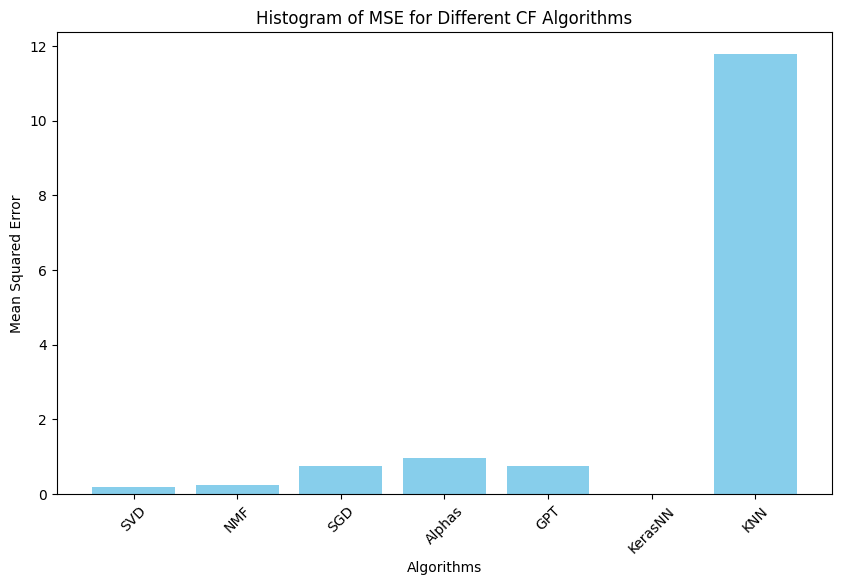

In [ ]:
model_names = ['SVD', 'NMF', 'SGD', 'Alphas', 'GPT', 'KerasNN', 'KNN']
mse_values = [svd_mse, nmf_mse, sgd_mse, alphas_mse, gpt_mse, keras_mse, knn_mse]

print_histograms_mse(model_names, mse_values)

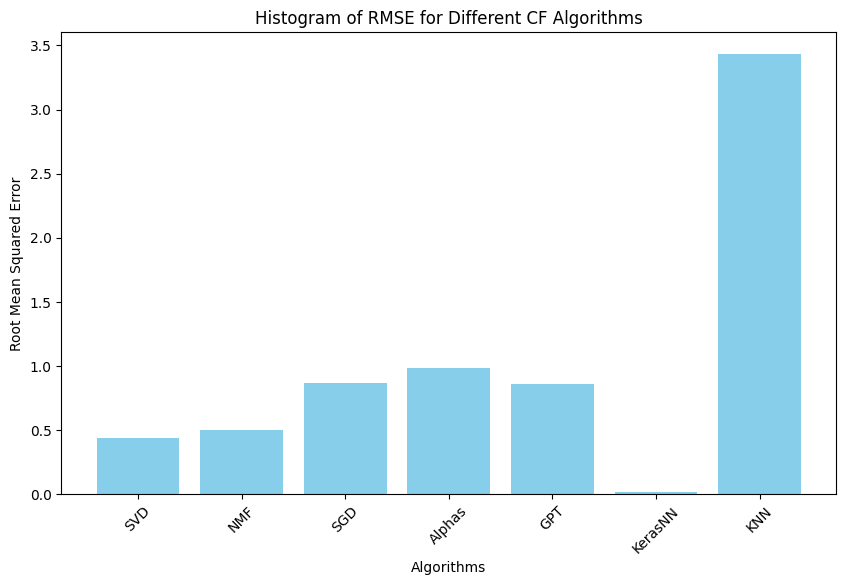

In [ ]:
rmse_values = [svd_rmse, nmf_rmse, sgd_rmse, alphas_rmse, gpt_rmse, keras_rmse, knn_rmse]

print_histograms_rmse(model_names, rmse_values)

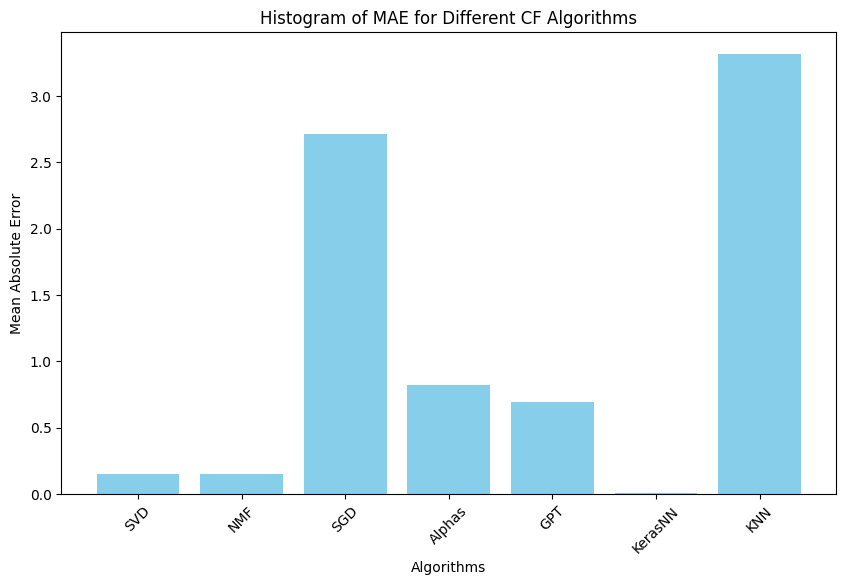

In [ ]:
mse_values = [svd_mae, nmf_mae, sgd_mae, alphas_mae, gpt_mae, keras_mae, knn_mae]

print_histograms_mae(model_names, mse_values)